In [1]:
!pip install sqlalchemy
!pip install psycopg2

In [2]:
#Import Dependencies
import pandas as pd
import pprint
import psycopg2
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

import sqlalchemy
from sqlalchemy.orm import sessionmaker
from sqlalchemy.exc import SQLAlchemyError
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

#Came across these in my reading and research
#The inspect, func, Column, Float, Integer, String, Date are very cool
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Float, Integer, String, Date
from sqlalchemy.ext.declarative import declarative_base
#from sqlalchemy import create_engine

#https://learn.co/lessons/dsc-2-13-10-queries-with-sqlalchemy
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base



def add(x, y):
    s = x + y
    return s

num1=1
num2=2
result = add(num1, num2)
print(result)

In [3]:
#Creation of a Python Function to generate the SQL database connection engine
#This custom python function will be used over and over throughout homeworks, class activities and projects
#Allows the engine to end-up being nothing more than the input of variables

def build_engine(user, pwd, host, port, db):
    engine = create_engine(f'postgresql://{user}:{pwd}@{host}:{port}/{db}')
    return engine

In [4]:
#Variable values used to be passsed into the Python custom engine build function for SQL database connections
user = 'postgres'
pwd = 'postgres'
host = 'localhost'
port = '5432'
db = 'EmployeeSQL'

engine = build_engine(user=user, pwd=pwd, host=host, port=port, db=db)

In [5]:
# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)
# Collect the names of tables within the database
inspector_gadget.get_table_names()

['employees', 'dept_emp', 'departments', 'dept_manager', 'salaries', 'titles']

##################################################################
###########ASK TUTOR#########################################

#https://learn.co/lessons/dsc-2-13-10-queries-with-sqlalchemy
metadata = MetaData()

metadata.reflect(engine)

Base = automap_base(metadata=metadata)

Base.prepare()

employees, dept_emp, departments = Base.classes.employees, Base.classes.dept_emp. Base.classes.departments
dept_manager, salaries, titles = Base.classes.dept_manager, Base.classes.salaries, Base.classes.titles

#After the engine is built, a data frame was created to read the SQL query and the subsequent line displays the data from the data frame

In [6]:
df_employee = pd.read_sql_query('select * from employees', con=engine)

In [7]:
display(df_employee)

,emp_no,birth_date,first_name,last_name,sex,hire_date,emp_title_id
0,473302,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001
1,475053,1954-11-18,Byong,Delgrande,F,1991-09-07,e0002
2,57444,1958-01-30,Berry,Babb,F,1992-03-21,e0002
3,421786,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001
4,282238,1952-10-28,Abdelkader,Baumann,F,1991-01-18,e0003
...,...,...,...,...,...,...,...
300019,464231,1958-08-14,Constantino,Eastman,M,1988-10-28,s0001
300020,255832,1955-05-08,Yuping,Dayang,F,1995-02-26,e0002
300021,76671,1959-06-09,Ortrud,Plessier,M,1988-02-24,s0001
300022,264920,1959-09-22,Percy,Samarati,F,1994-09-08,s0001


#For practice purposes, I am brining in all tables

In [8]:
df_salaries = pd.read_sql_query('select * from salaries', con=engine)
display(df_salaries)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [9]:
df_dept_emp = pd.read_sql_query('select * from dept_emp', con=engine)
display(df_dept_emp)

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
...,...,...
331598,499995,d004
331599,499996,d004
331600,499997,d005
331601,499998,d002


In [10]:
df_titles = pd.read_sql_query('select * from titles', con=engine)
display(df_titles)

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [11]:
df_departments = pd.read_sql_query('select * from departments', con=engine)
display(df_departments)

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [12]:
df_titles = pd.read_sql_query('select * from titles', con=engine)
display(df_titles)

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [13]:
df_dept_manager = pd.read_sql_query('select * from dept_manager', con=engine)
display(df_dept_manager)

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183
5,d003,110228
6,d004,110303
7,d004,110344
8,d004,110386
9,d004,110420


In [14]:
#Shape of the df_Salaries
#Has 300,034 rows and 2 columns
df_salaries.shape

(300024, 2)

In [15]:
# Using the inspector_gadget to print the column names within the 'salaries' table and its types
#For SQLAlchemy, inspect is my favorite thing!  Too much fun!
columns = inspector_gadget.get_columns('salaries')
for column in columns:
    print(column["name"], column["type"])

emp_no INTEGER
salary BIGINT


In [16]:
#create salaries_chart class
#ASK TUTOR
#Create the salaries chart class because I could not query or map or do anything using regular SQLAlchemy until 
#I converted it to a class
#Why could I not use Session and Qyery in line 18 aginst my DF?  Why did I have to create or convert to class?

#Base was defined as a dependency in the forst line group based on the results of my queries
#https://www.tutorialspoint.com/sqlalchemy/sqlalchemy_orm_declaring_mapping.htm
#https://rszalski.github.io/magicmethods/
#https://www.pythonsheets.com/notes/python-sqlalchemy.html    

class salaries_chart(Base):
    __tablename__ = 'salaries'
    emp_no = Column(Integer, primary_key=True)
    salary = Column(Integer)


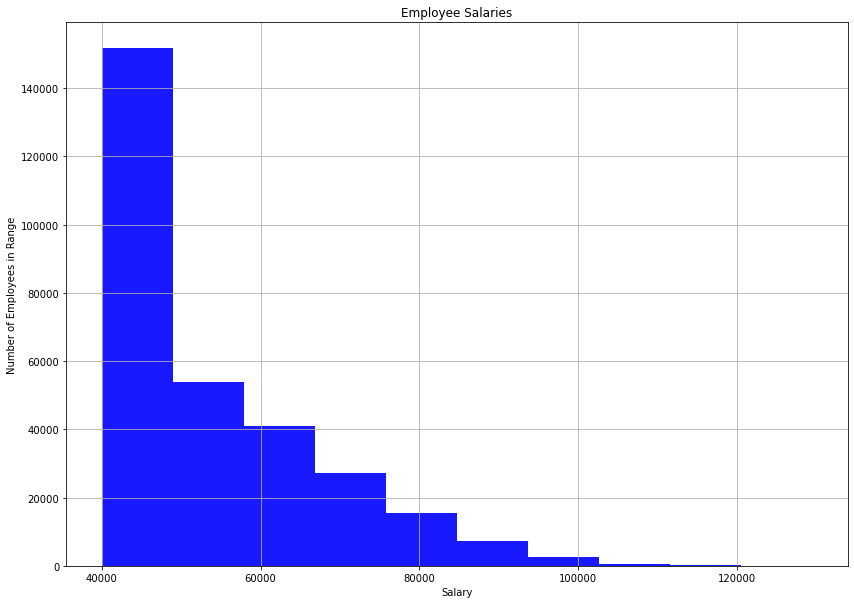

In [17]:
# Plot the Results in a Matplotlib bar chart

#After converting or creating the salaries table to a salaries_chart class, I was able to query it
#and make the values along the X axis the salary values
#Defined session by using the Session (part of line 1 imports) alchemy command and engine defined earlier.
session = Session(engine)
x=session.query(salaries_chart.salary)

#converted x, the result of the session query above into a data frame
salary_plot_df = pd.DataFrame(x, columns=['salary'])
a = np.array(salary_plot_df)
x = a[0:,0]
fig, ax = plt.subplots(figsize=(14, 10))

# the histogram of the data
n, bins, patches = plt.hist(x, 10, facecolor='blue', alpha=0.90)

plt.grid(True)
plt.xlabel('Salary')
plt.ylabel('Number of Employees in Range')
plt.title('Employee Salaries')
seaborn= 'white grid'
plt.show()
fig.savefig('Histogram_of_Employee_Salaries.png')

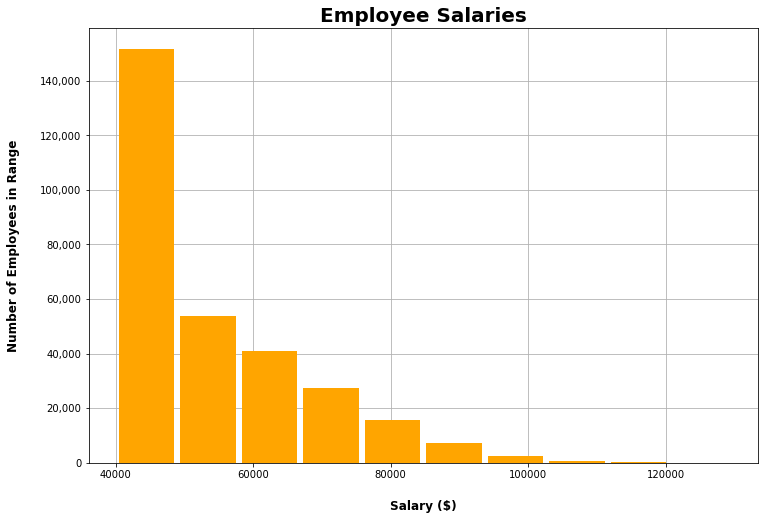

In [18]:
# Create a histogram to visualize the most common salary ranges for employees.
#Creating this for a second time using the tables imported in as DF earlier in the notebook.
#First time converted to classes and used those for mapping.
#This time creating using table df for SQLAlchemy Practice
x_axis = df_salaries.hist(column='salary', bins=10, grid=False, figsize=(12,8), color='orange', zorder=2, rwidth=0.9)
0
x_axis = x_axis[0]
for x in x_axis:

     # Set x-axis label
    x.set_xlabel("Salary ($)", labelpad=20, weight='bold', size=12)

    # y-axis label
    x.set_ylabel("Number of Employees in Range", labelpad=20, weight='bold', size=12)
    
    # title label
    x.set_title("Employee Salaries", weight='bold', size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
plt.grid(True) 
seaborn= 'white grid'      
plt.savefig('Salary_Distribution_Alternative_Approach.png')

In [19]:
#Average Salary by Title

avg_salary_title_df = pd.read_sql("""SELECT titles.emp_title_id, AVG(salaries.salary)
                        FROM employees
                        JOIN salaries 
                        ON employees.emp_no = salaries.emp_no
                        JOIN titles
                        ON titles.emp_title_id = employees.emp_title_id
                        GROUP BY titles.emp_title_id""", engine)

avg_salary_title_df

,emp_title_id,avg
0,e0001,48564.434447
1,e0002,48535.336511
2,e0003,48506.799871
3,e0004,48582.896092
4,m0001,51531.041667
5,s0001,58465.382850
6,s0002,58550.172704


In [27]:
#Had to merge the average salalry title 

avg_salary_title_merged_df=pd.merge(avg_salary_title_df, df_titles, how='left', on = 'emp_title_id')

In [29]:
avg_salary_title_merged_df

,emp_title_id,avg,title
0,e0001,48564.434447,Assistant Engineer
1,e0002,48535.336511,Engineer
2,e0003,48506.799871,Senior Engineer
3,e0004,48582.896092,Technique Leader
4,m0001,51531.041667,Manager
5,s0001,58465.382850,Staff
6,s0002,58550.172704,Senior Staff


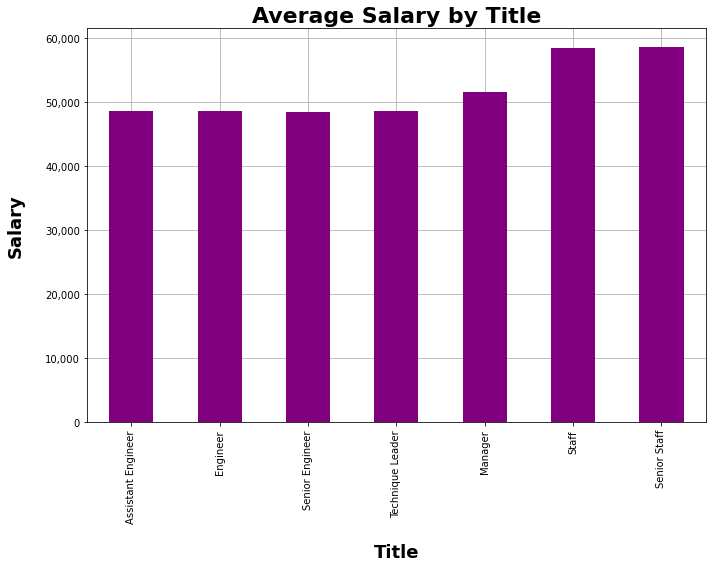

In [30]:
# Create a bar chart of average salary by title
#Instead of playing around with class as I did for the first bonus chart, I decided to the avg_salary_df created above

ax = avg_salary_title_merged_df.plot.bar(x='title', y='avg', rot=90, grid=False, figsize=(10,8), color='purple', zorder=2)

# Draw horizontal axis lines
vals = x.get_yticks()
for tick in vals:
    x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='blue', zorder=1)
#Remove Legend
ax.get_legend().remove()

# Set x-axis label
ax.set_xlabel("Title", labelpad=20, weight='bold', size=18)

# Set y-axis label
ax.set_ylabel("Salary", labelpad=20, weight='bold', size=18)
    
# Set Title
ax.set_title("Average Salary by Title", weight='bold', size=22)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.tight_layout()
plt.grid(True) 
seaborn= 'white grid' 
plt.savefig('Average_Salary_Title.png')

In [ ]:
df= pd.DataFrame(x, cols)

In [10]:
class Person:
    
    def __init__(self, first_name, last_name):
        self.f_name = first_name
        self.l_name = last_name
        
    def greeting(self):
        print(f'Hi, my name is {self.f_name}')
    
    def greeting_long(self):
        print(f'Hello, my name is {self.f_name} {self.l_name}')
        

In [11]:
p1 = Person('Markus', 'Shipley')
p1.greeting()
p1.greeting_long()

Hi, my name is Markus
Hello, my name is Markus Shipley


In [13]:
p2 = Person('A', 'B')
p2.greeting()
p2.greeting_long()

Hi, my name is A
Hello, my name is A B
